In [46]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat


In [48]:
data = pd.read_csv(r"/kaggle/input/housedata/data.csv")
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [49]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [50]:
data = data.drop(['date', 'street', 'city', 'statezip', 'country'], axis=1)

In [51]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64


In [52]:
from scipy.stats import zscore
z_scores = zscore(data[['price', 'sqft_living', 'bedrooms']])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]


In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['sqft_living', 'sqft_lot']] = scaler.fit_transform(data[['sqft_living', 'sqft_lot']])

In [54]:
data.drop_duplicates(inplace=True)

In [55]:
data['is_renovated'] = data['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
data.drop(['yr_renovated','yr_built',"sqft_above"], axis=1, inplace=True)

In [56]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,is_renovated
0,313000.0,3.0,1.50,0.209052,0.006775,1.5,0,0,3,0,1
2,342000.0,3.0,2.00,0.336207,0.010534,1.0,0,0,4,0,0
3,420000.0,3.0,2.25,0.351293,0.006885,1.0,0,0,4,1000,0
4,550000.0,4.0,2.50,0.338362,0.009186,1.0,0,0,4,800,1
5,490000.0,2.0,1.00,0.109914,0.005348,1.0,0,0,3,0,1


In [57]:
X = data.drop(['price'], axis=1)  # Features
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Histogram of house prices

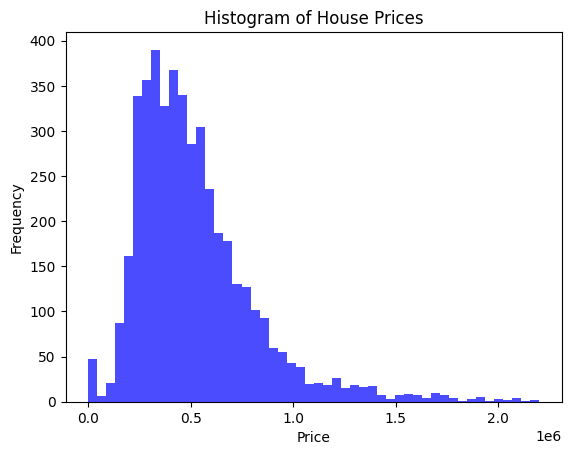

In [58]:
plt.hist(data['price'], bins=50, color='blue', alpha=0.7)
plt.title('Histogram of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Scatter plot of Living Area vs. Price:

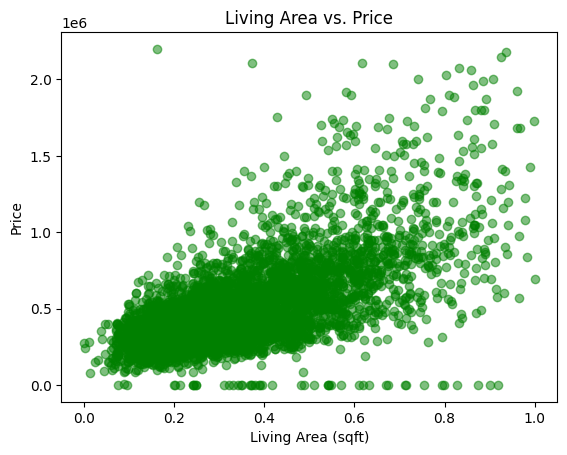

In [59]:
plt.scatter(data['sqft_living'], data['price'], color='green', alpha=0.5)
plt.title('Living Area vs. Price')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.show()

## Box plot of Bedrooms vs. Price:

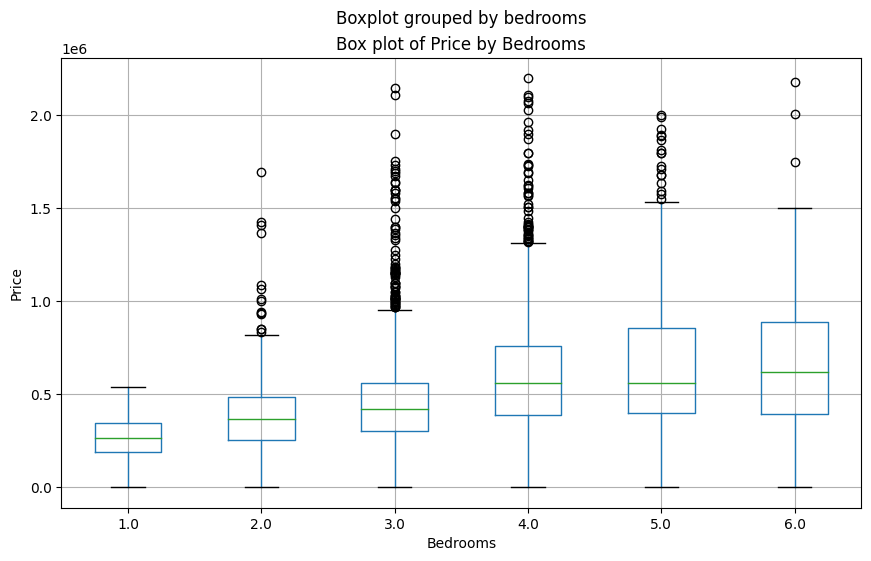

In [60]:
data.boxplot(column='price', by='bedrooms', figsize=(10,6))
plt.title('Box plot of Price by Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

## Correlation Matrix Heatmap:

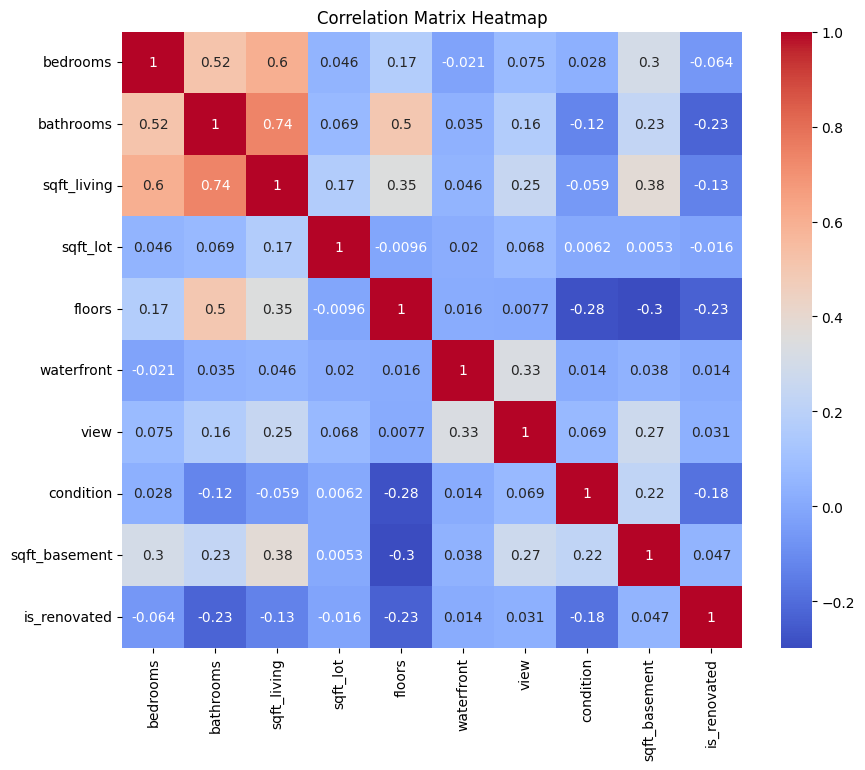

In [61]:
import seaborn as sns
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Linear Regression

In [62]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [63]:
y_pred = model.predict(X_test)

In [64]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 48235691814.69787
R^2 Score: 0.44895366371421586


# Hyperparameter training

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [66]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('regressor', LinearRegression())  # Linear regression model
])

In [67]:
parameters = {
    'regressor__fit_intercept': [True, False],  # Whether to calculate the intercept for the model
}

In [68]:
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [69]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [70]:
y_pred = best_model.predict(X_test)
mse_new = mean_squared_error(y_test, y_pred)
r2_new = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2_new)

Best Hyperparameters: {'regressor__fit_intercept': True}
Mean Squared Error: 48235691814.69787
R^2 Score: 0.44895366371421574


# Ridge Regression

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [73]:
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha) if needed
ridge_model.fit(X_train, y_train)

Ridge()

In [74]:
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Mean Squared Error:", mse_ridge)
print("Ridge Regression R^2 Score:", r2_ridge)

Ridge Regression Mean Squared Error: 48319837030.22839
Ridge Regression R^2 Score: 0.4479923856441883


# ElasticNet Regression

In [75]:
from sklearn.linear_model import ElasticNet

In [76]:
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can adjust the regularization strength (alpha) and the L1 ratio
elasticnet_model.fit(X_train, y_train)


ElasticNet()

In [77]:
y_pred_elasticnet = elasticnet_model.predict(X_test)
mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
r2_elasticnet = r2_score(y_test, y_pred_elasticnet)

print("ElasticNet Regression Mean Squared Error:", mse_elasticnet)
print("ElasticNet Regression R^2 Score:", r2_elasticnet)

ElasticNet Regression Mean Squared Error: 63516539656.58644
ElasticNet Regression R^2 Score: 0.27438468995592014
